# 선형회귀 직접 구현

## 데이터셋 준비

 - 사이킷런 임의 회귀 데이터 생성

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50)
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

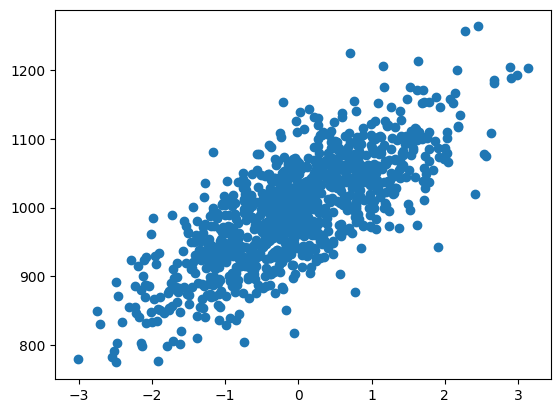

In [3]:
plt.scatter(data[0], data[1])
plt.show()

In [4]:
x_train = data[0]
y_train = data[1]

n_data = len(x_train)
# n_data = x_train.shape[0]
print(n_data, x_train.shape, y_train.shape)

1000 (1000, 1) (1000,)


## Hypothesis, Cost 정의

 - hypothesis: x_train * w1 + w0
 - cost : RSS -> MSE

RSS(Residual Sum of Squared): 잔차제곱합

```python
hypothesis = w1 * x_train + w0  # y_pred   (1000, )  
cost = np.sum((hypothesis - y_train)**2) / n_data   # (1000, 0) -> sum
```

## Weight 초기화

In [7]:
w1 = np.random.rand(1)
w0 = np.random.rand(1)
print(w1, w0)

[0.99322684] [0.96849256]


## y_pred 계산

In [8]:
y_pred = w1 * x_train + w0

In [9]:
y_pred.shape

(1000, 1)

## cost 계산

 - cost = np.sum((y_train - y_pred) ** 2) / n_data

In [11]:
y_pred.shape

(1000, 1)

In [12]:
y_train.shape

(1000,)

In [13]:
(y_pred.reshape(-1) - y_train).shape    # y_pred와 y_train의 연산 수행을 위해 y_pred에 reshape를 해준다.

(1000,)

In [14]:
cost = np.sum((y_pred.reshape(-1) - y_train)**2) / n_data
cost

995863.5714505463

## Weight 업데이트

 - w1 = (-1) * np.sum((y_train - y_pred)  * x_train) * 2 / n_data
 - w0 = (-1) * np.sum(y_train - y_pred) * 2 / n_data

In [15]:
y_train.shape

(1000,)

In [16]:
w1 -= np.sum((y_pred.reshape(-1) - y_train) * x_train) * 2 / n_data
w0 -= np.sum((y_pred.reshape(-1) - y_train)) * 2 / n_data

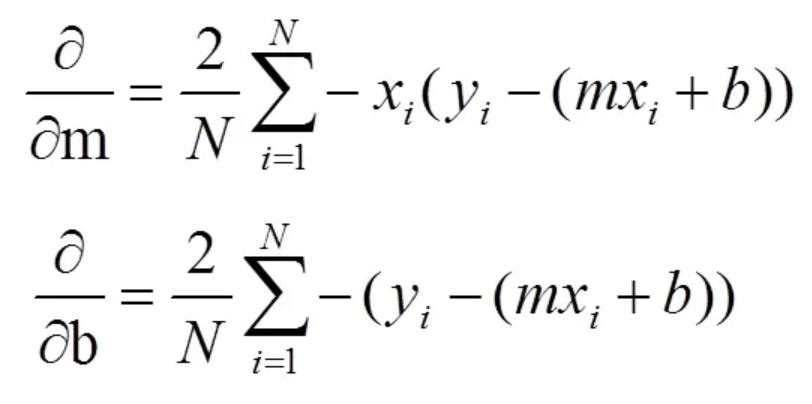

## 반복

 - epochs : 반복횟수
 - learning rate : 학습률

 - 출력 지우기
    - from IPython.display import clear_output
    - clear_output()

In [17]:
epochs = 1000
learning_rate = 0.01

In [18]:
cost_list = []
for epoch in range(epochs):
    # 1. y_pred 계산
    y_pred = w1 * x_train + w0  # (1000, 1)

    # 2. cost 계산
    cost = np.mean((y_pred.reshape(-1) - y_train) ** 2)

    # 3. weight 업데이트
    gradient_w1 = np.sum((y_pred - y_train.reshape(-1, 1)) * x_train * 2) / n_data
    w1 -= learning_rate * gradient_w1

    gradient_w0 = np.sum((y_pred - y_train.reshape(-1, 1)) * 2) / n_data
    w0 -= learning_rate * gradient_w0

    cost_list.append(cost)

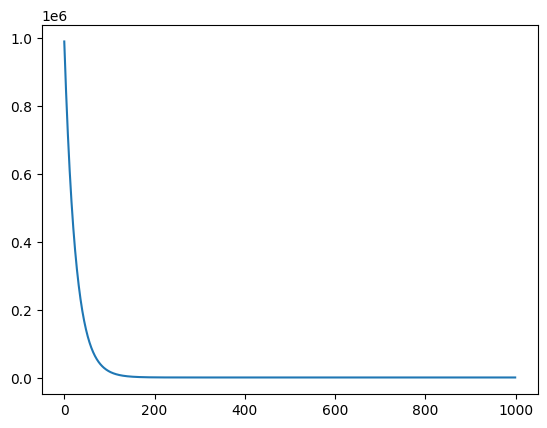

In [19]:
plt.plot(cost_list)
plt.show()

In [20]:
w1, w0

(array([59.0112653]), array([997.96004036]))

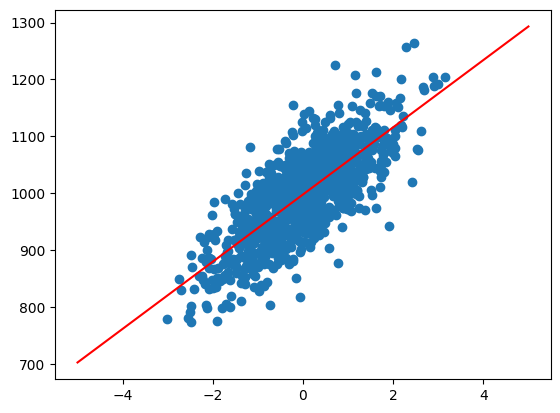

In [21]:
plt.plot([-5, 5], [-5*w1+w0, 5*w1+w0], 'r')
plt.scatter(x_train, y_train)
plt.show()

In [26]:
class SimpleLinearRegression:

    def __init__(self):
        self.w1 = None
        self.w0 = None

    def fit(self, x_data, y_data):
        self.w1 = np.sum((w1 * self.x_data + w0 - y_data.reshape(-1, 1)) * x_data * 2) / len(x_data)
        self.w0 = np.sum((w1 * self.x_data + w0 - y_data.reshape(-1, 1)) * 2) / len(x_data)

    def predict(self, x_data):
        return self.w1 * x_data + w0

    def score(self, y1, y2):
        y1 = w1 * self.x_data + w0
        y2 = self.y_data
        return np.mean((y1 - y2) ** 2)

In [27]:
X = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

model = SimpleLinearRegression()
model.fit(X, y)

new_X = [6, 7, 8]
new_y = [13, 15, 17]
predictions = model.predict(new_X)
cost = model.score(new_X, new_y)

print(f"predictions: {predictions}, cost: {cost}")

AttributeError: ignored